<a href="https://colab.research.google.com/github/jytsalcido/Course-Registration-System/blob/main/capm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please follow the instructions carefully. Write all your code in a `Code` cell, and your explanations in a `Markdown` cell. Make sure that your code compiles correctly either by selecting a given cell and clicking the `Run` button, or by hitting `shift`+`enter` or `shift`+`return`.

### 1. Import `numpy`, `numpy.linalg`, `matplotlib.pyplot`, and `pandas`. Use the appropriate aliases when importing these modules.

In [ ]:
# code for question 1
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd

### 2. Load the data from the file named `data_stock_returns.csv` into a `DatFrame` called `returns`. The file `data_stock_returns.csv` contains daily returns of a number of stocks selected from the S&P 500 universe. The rows of the csv file represent the returns over a number of days, and the columns represent individual stocks labeled by their NYSE ticker symbol, e.g., Apple stock is labeled `AAPL`.

In [ ]:
# code for question 2
data = pd.read_csv('data_stock_returns.csv',index_col = 'Date')

### 3. View the `head` of the `returns` `DataFrame`

In [ ]:
# code for question 3
print(data.head(10))

                ATVI      CHTR     CMCSA       CTL       DIS     DISCA  \
Date                                                                     
2019-01-02  0.009829  0.010542  0.009354  0.018961 -0.006221  0.043115   
2019-01-03 -0.036155 -0.001703  0.007825  0.004524 -0.024525 -0.005824   
2019-01-04  0.039127  0.051651  0.033218  0.027974  0.030381  0.017754   
2019-01-07  0.027806 -0.004204 -0.010668  0.021706  0.008630  0.014810   
2019-01-08  0.029859 -0.002524  0.008152  0.025441  0.007748  0.026410   
2019-01-09  0.017064 -0.010262  0.009474 -0.033448  0.011156  0.001467   
2019-01-10  0.010178 -0.016839 -0.006678 -0.010569  0.001153 -0.017379   
2019-01-11 -0.098353  0.006369 -0.005318  0.016734 -0.001331  0.011497   
2019-01-14  0.015987 -0.010169  0.003922 -0.003078 -0.002044 -0.004435   
2019-01-15 -0.009561  0.008334  0.001676 -0.001851 -0.005888  0.003697   

               DISCK      DISH        EA        FB  ...       NEE        NI  \
Date                            

### 4. View the `tail` of the `returns` `DataFrame`

In [ ]:
# code for question 4
print(data.tail())

           Date      ATVI      CHTR     CMCSA       CTL       DIS     DISCA  \
247  2019-12-24 -0.001359  0.000291  0.009703 -0.002277  0.004207  0.003943   
248  2019-12-26  0.001359  0.010077  0.009833 -0.003807  0.002818  0.007540   
249  2019-12-27  0.005081 -0.004209  0.002887  0.023371  0.000343 -0.004517   
250  2019-12-30 -0.005251 -0.001262  0.001772 -0.024134 -0.013678 -0.011231   
251  2019-12-31  0.009129  0.004132 -0.004659  0.008362  0.005964 -0.000611   

        DISCK      DISH        EA  ...       NEE        NI       NRG  \
247  0.007496  0.001956  0.007026  ...  0.007219 -0.000729 -0.004752   
248  0.004212  0.008617 -0.000369  ...  0.006011 -0.002921 -0.016684   
249 -0.005511 -0.004994 -0.000738  ...  0.002271 -0.002196  0.000000   
250 -0.008161 -0.015700 -0.013930  ... -0.005043  0.008393  0.000000   
251 -0.000656  0.002258  0.005409  ...  0.003599  0.011561  0.013168   

          PEG       PNW       PPL        SO       SRE       WEC       XEL  
247 -0.001537 -0

### 5. How many stocks are in this `DataFrame`?

In [ ]:
# code for question 5
print(data.shape)

(252, 489)


**ANSWER FOR QUESTION 5**: 489 stocks

### 6. Over how many days are these stock returns reported?

In [ ]:
# code for question 6
print(data.shape)

(252, 489)


**ANSWER FOR QUESTION 6**: 252 days

### 7. Extract the returns of the Amazon stock only, which has a ticker symbol `AMZN`. Save it in a `Series` called `amzn_returns`.

In [ ]:
# code for question 7
amzn_returns = data['AMZN']

### 8. Plot the Amazon stock returns extracted in the above cell.

<Axes: title={'center': 'AMZN'}, xlabel='Day', ylabel='Return'>

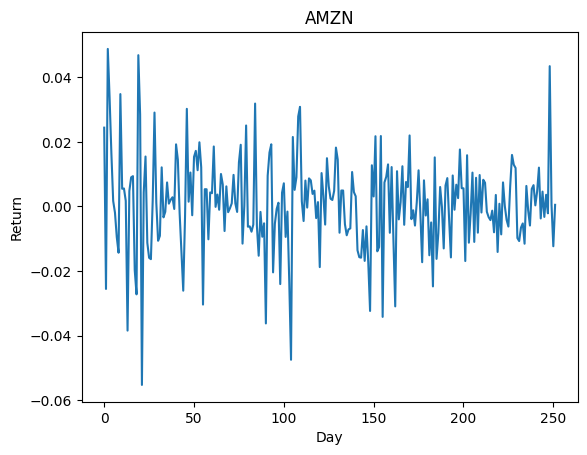

In [ ]:
# code for question 8
amzn_returns.plot(xlabel = 'Day', ylabel = 'Return', title = 'AMZN')

### 9. Plot the cumulative sum of the Amazon stock returns using the method `.cumsum()` which acts directly on the `amzn_returns` `Series`.

<Axes: title={'center': 'AMZN'}, xlabel='Day', ylabel='Cumulative sum of returns'>

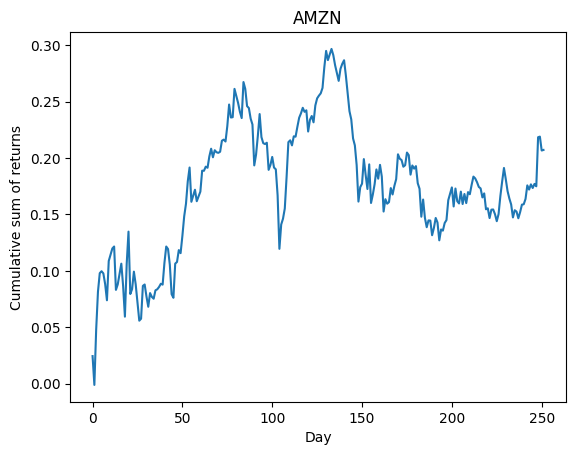

In [ ]:
# code for question 9
amzn_returns.cumsum().plot(xlabel = 'Day', ylabel = 'Cumulative sum of returns', title = 'AMZN')

In [ ]:
# the module below will allow us to perform linear regression
import statsmodels.api as sm

The function `lin_reg(x,y)` given below performs ordinary least squares (OLS) linear regression using `sm.OLS` from the `statsmodels.api` module.

The code enclosed in `''' '''` is the docstring of the function `lin_reg`.

`x` in the `lin_reg` function is a matrix that contains the regressors, and `y` represents the vector containing the dependent variable. Note that `x` might contain one vector or multiple vectors. In the case that `x` contains one vector $x$, the regression gives:

$$ y = \beta_0 + \beta_1 x $$

In the case that `x` contains multiple vectors $x_1, \dots, x_k$, the regression becomes:

$$ y = \beta_0 + \beta_1 x_1 + \dots + \beta_k x_k$$

The $\beta$'s are the regression coefficients obtained using least squares. Note that `sm.add_constant` is used in the function below to make `x` look like the matrix $A$ we use in least squares, whose first column contains all ones.

In [ ]:
def lin_reg(x, y):
    '''
    ordinary linear regression using least-squares

    Parameters
    ----------
    x: regressors (numpy array)
    y: dependent variable (numpy array)

    Returns
    -------
    coefficients: regression coefficients (pandas Series)
    residuals: regression residuals (numpy array)
    r_squared: correlation coefficient (float)

    '''
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    coefficients = model.params
    residuals = model.resid
    r_squared = model.rsquared
    return coefficients, residuals, r_squared

### 10. Let's try to use the above function. Extract (as numpy array) the stock returns of:

- Apple (ticker symbol `AAPL`) and call it `aapl`
- Intel (ticker symbol `INTC`) and call it `intc`
- Microsoft (ticker symbol `MSFT`) and call it `msft`
- IBM (ticker symbol `IBM`) and call it `ibm`

### Let `y` be the Apple stock returns, and `x` be the Intel stock returns. Use the `lin_reg` function defined above to find $y=\beta_0 + \beta_1 x$.

In [ ]:
# code for question 10
y = data['AAPL'].to_numpy()
x = data['INTC'].to_numpy()
coeffs11, resids11, rsquared11 = lin_reg(x,y)

### 11. Plot the cumulative sum of the Apple returns prediction from least squares on top of the actual Apple returns. How well do the Intel stock returns describe the Apple stock returns?

<Axes: title={'center': 'Apple'}, xlabel='Day', ylabel='Cumulative returns'>

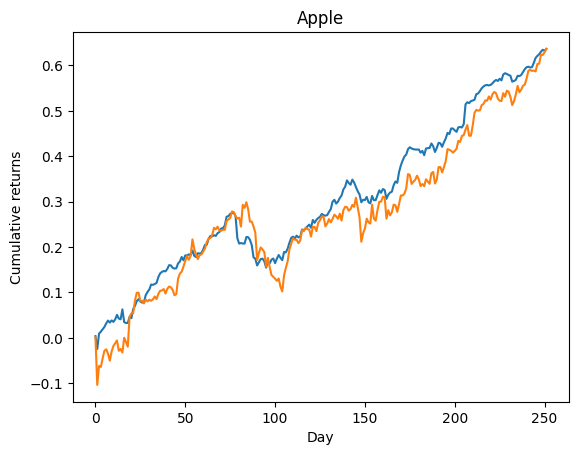

In [ ]:
# code for question 11
pd.Series(coeffs11[1]*x + coeffs11[0]).cumsum().plot(xlabel='Day',ylabel='Cumulative returns',title='Apple')
pd.Series(y).cumsum().plot()

### 12. Now, let `y` be the Apple stock returns, and `x` be the Intel, Microsoft, and IBM stock returns. Use the `lin_reg` function defined above to find $y=\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3$, where $x_1$ represents Intel returns, $x_2$ represents Microsoft returns, and $x_3$ represents IBM returns.

In [ ]:
# code for question 12
x = data[['INTC','MSFT','IBM']].to_numpy()
coeffs12, resids12, rsquared12 = lin_reg(x, y)
print(coeffs12)

[0.00111582 0.28414114 0.54372266 0.15058611]


### 13. Plot the cumulative sum of the Apple returns prediction from least squares on top of the cumulative sum of actual Apple returns. How well do the Intel, Microsoft, and IBM stock returns describe the Apple stock returns?

<Axes: title={'center': 'Apple'}, xlabel='Day', ylabel='Cumulative returns'>

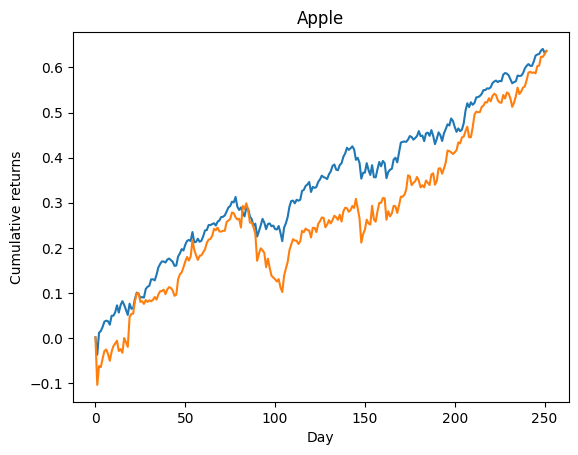

In [ ]:
# code for question 13
pd.Series(coeffs12[3]*x[:,2] + coeffs12[2]*x[:,1] + coeffs12[1]*x[:,0] + coeffs12[0]).cumsum().plot(xlabel='Day',ylabel='Cumulative returns',title='Apple')
data['AAPL'].cumsum().plot()

The file `SPY.csv` contains the prices of SPDR S&P 500 ETF Trust. This Exchange Traded Fund (ETF) contains a collection of assets currently present in the S&P 500 index.

### 14. Load `SPY.csv` into a DataFrame called `spy_prices` using the `read_csv` method in `pandas`. Make sure to make the 'Date' column to be your index column. To do that, read the docstring for `read_csv`.

In [ ]:
# code for question 14
spy_prices = pd.read_csv('SPY.csv', index_col = 'Date')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,206.880005,204.179993,206.380005,205.429993,121465900.0,184.260223
2015-01-05,204.369995,201.350006,204.169998,201.720001,169632600.0,180.932541
2015-01-06,202.720001,198.860001,202.089996,199.820007,209151400.0,179.228363
2015-01-07,202.720001,200.880005,201.419998,202.309998,125346700.0,181.461731
2015-01-08,206.160004,203.990005,204.009995,205.899994,147217800.0,184.681763


### 15. Once you have downloaded the file into the `DataFrame`, observe all the available prices and dates. Show the head of the `DataFrame`, and then answer the following questions:

(a) Which prices are reported?

(b) From which date to which date are these prices reported?

In [ ]:
# code for question 15
spy_prices.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,206.880005,204.179993,206.380005,205.429993,121465900.0,184.260223
2015-01-05,204.369995,201.350006,204.169998,201.720001,169632600.0,180.932541
2015-01-06,202.720001,198.860001,202.089996,199.820007,209151400.0,179.228363
2015-01-07,202.720001,200.880005,201.419998,202.309998,125346700.0,181.461731
2015-01-08,206.160004,203.990005,204.009995,205.899994,147217800.0,184.681763
2015-01-09,206.419998,203.509995,206.399994,204.250000,158567300.0,183.201797
2015-01-12,204.600006,201.919998,204.410004,202.649994,144396100.0,181.766663
2015-01-13,205.479996,200.509995,204.119995,202.080002,214553300.0,181.255432
2015-01-14,201.100006,198.570007,199.649994,200.860001,192991100.0,180.161163


**ANSWER FOR QUESTION 15**: double click on this cell to write your answer

### 16. Retain only the Adjusted Close price in the `spy_prices` `DataFrame`. Call the resulting `Series` `spy_adjclose`.

In [ ]:
# code for question 16
spy_adjclose = spy_prices['Adj Close']

### 17. Now, using the `pct_change` method in `pandas`, compute the returns on the Adjusted Close prices of SPY, and only retain the returns from '2019-01-01' to '2020-01-01'. Call the `Series` obtained `spy_returns`.

In [ ]:
# code for question 17
spy_returns = spy_adjclose.loc['2019-01-01' : '2020-01-01'].pct_change()

### 18. Perform SVD on `returns` data that contain assets from the S&P 500. Retain the left singular vector corresponding to the largest singular value and call is `u_sigma1`.

In [ ]:
# code for question 18


### 19. `u_sigma1` is thought to track the market. To test that, we will perform a regression of `spy_returns` against this first left singular vector by letting `y=spy_returns` and `x=u_sigma1` and computing

### $$ y = \beta_0 + \beta_1 x$$
### using least squares regression.

In [ ]:
# code for question 19


### 20. Plot the cumulative sum of the result from the regression on top of the cumulative sum of `spy_returns`. What do you notice?

In [ ]:
# code for question 20


**ANSWER FOR QUESTION 20**: double click on this cell to write your answer

# Congratulations! You have just implemented your first statistical Capital Asset Pricing Model (CAPM) to the S&P 500 market.